In [1]:
pkg load statistics
pkg load control

In [2]:
muRange = 51:0.02:55;
N = 100;
n = 20;
mu0 = 53;
sigma = 1.2;
powerT = size(1,length(muRange));
powerU = size(1,length(muRange));
index = 1;

In [3]:
for muActual = muRange
    dist = normrnd(muActual,sigma,[1,100]);
    rejectT = 0;
    rejectU = 0;
    for i =1:N
        data = randsample(dist,n);
        xBar = mean(data);
        stdDev = std(data);
        tStatT = (xBar - mu0)/(stdDev/sqrt(n));
        pValT = (1-tcdf (abs(tStatT), n-1))*2;
        if pValT< 0.05
            rejectT = rejectT+1;
        endif
        
        xPositive = 0;
        for j = data
            if j > mu0
                xPositive = xPositive +1;
            endif
        endfor
        uStat = max(xPositive, n-xPositive);
        pValSign = 2*binopdf(uStat,n,0.5);
        if pValSign< 0.05
            rejectU = rejectU+1;
        endif

     endfor
     powerT(1,index) = rejectT/N;
     powerU(1,index) = rejectU/N;
     index = index+1;
endfor

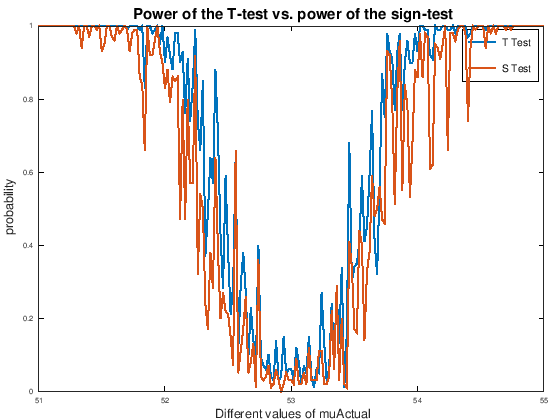

In [5]:
graphics_toolkit ("gnuplot");
plot(muRange,powerT,'LineWidth',4,muRange,powerU,'LineWidth',4);
h = legend({'T Test','S Test'});
set (h, "fontsize", 14);
title('{\fontsize{30} Power of the T-test vs. power of the sign-test}')
axis([51 55 0 1])
xlabel('{\fontsize{25} Different values of muActual}');
ylabel('{\fontsize{25} probability}');
hold off;